In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from scipy.stats import kstest, wilcoxon

In [16]:
pd.options.display.max_columns = None

In [ ]:
# Let's take a closer look at the six month mark - thus, drop all the other time categories

In [3]:
df = pd.read_csv(r'D:\Programming\LHL-data-notes\Final\data\collapsed.csv')

In [31]:
df.head()

,Unnamed: 0.1,book_id,Unnamed: 0,rating,text_reviews_count,original_publication_year,ratings_count,month_diff,time_cat,BERT_sent,overall_rating,over_6m_BERT,over1y_BERT,6m_BERT,1y_BERT,6m_rating,1y_rating,over_6m_rating,over1y_rating
34,34,5453,840523.091633,3.553785,1713.0,2007.0,61106.0,60.860558,20.846614,0.788842,3.802278,0.788259,0.783401,0.934501,0.851687,3.0,3.150000,3.556000,3.588745
238,238,23229,613195.700000,2.800000,25.0,2007.0,215.0,49.800000,24.650000,0.711786,3.627907,0.696401,0.753227,0.850256,0.546024,2.0,3.000000,2.888889,2.750000
247,247,23242,858167.666667,3.407407,82.0,2007.0,882.0,44.370370,5.611111,0.660442,3.552154,0.649224,0.649224,0.952110,0.952110,2.0,2.000000,3.461538,3.461538
268,268,24880,822349.923077,2.846154,91.0,2006.0,554.0,71.153846,8.115385,0.555822,3.487365,0.522164,0.522164,0.959720,0.959720,3.0,3.000000,2.833333,2.833333
335,335,30183,864761.157046,3.160441,13023.0,2007.0,376023.0,64.584041,13.006154,0.626901,3.788476,0.627004,0.626180,0.384349,0.707163,5.0,3.666667,3.159660,3.155889


In [4]:
df = df.dropna(subset = ['6m_BERT'])

In [5]:
df.isnull().sum()

Unnamed: 0.1                     0
book_id                          0
Unnamed: 0                       0
rating                           0
text_reviews_count               0
original_publication_year        0
ratings_count                    0
month_diff                       0
time_cat                         0
BERT_sent                        0
overall_rating                   0
over_3m_BERT                 15891
over_6m_BERT                 24642
over1y_BERT                  35963
3m_BERT                      10680
6m_BERT                          0
1y_BERT                          0
3m_rating                    10680
6m_rating                        0
1y_rating                        0
over_3m_rating               15891
over_6m_rating               24642
over1y_rating                35963
dtype: int64

In [6]:
df = df.dropna(subset = ['over_6m_BERT'])

In [7]:
df.isnull().sum()

Unnamed: 0.1                     0
book_id                          0
Unnamed: 0                       0
rating                           0
text_reviews_count               0
original_publication_year        0
ratings_count                    0
month_diff                       0
time_cat                         0
BERT_sent                        0
overall_rating                   0
over_3m_BERT                     0
over_6m_BERT                     0
over1y_BERT                  11321
3m_BERT                       8239
6m_BERT                          0
1y_BERT                          0
3m_rating                     8239
6m_rating                        0
1y_rating                        0
over_3m_rating                   0
over_6m_rating                   0
over1y_rating                11321
dtype: int64

In [8]:
df.drop(['3m_BERT','over_3m_BERT','3m_rating','over_3m_rating'], axis=1, inplace=True)


In [42]:
df.isnull().sum()

book_id                          0
Unnamed: 0                       0
rating                           0
text_reviews_count               0
original_publication_year        0
ratings_count                    0
month_diff                       0
time_cat                         0
BERT_sent                        0
overall_rating                   0
over_6m_BERT                     0
over1y_BERT                  11321
6m_BERT                          0
1y_BERT                          0
6m_rating                        0
1y_rating                        0
over_6m_rating                   0
over1y_rating                11321
dtype: int64

In [9]:
# See if reviews up to 6mos after publication are different from reviews after 6mos
df_sent_change = df[['6m_BERT','over_6m_BERT']]

In [14]:
scaler = StandardScaler()
scaler.fit(df_sent_change)
rs_compare = scaler.transform(df_sent_change)

In [15]:
scaled_sent_change = pd.DataFrame(rs_compare, index=df_sent_change.index, columns=df_sent_change.columns)

In [16]:
# Should we do a paired t-test(need normal-ish distribution) or a Wilcoxin sign rank?
# Check for normality

ks_statistic, p_value = kstest(scaled_sent_change['6m_BERT'], 'norm')
print(ks_statistic, p_value)

ks_statistic2, p_value2 = kstest(scaled_sent_change['over_6m_BERT'], 'norm')
print(ks_statistic2, p_value2)

0.0717912218812759 0.0
0.061345308199685755 5.041549438865886e-249


In [17]:
# Definitely not normally distributed! Let's use the wilcoxen sign ranked
wilcoxon(x=scaled_sent_change['6m_BERT'], y=scaled_sent_change['over_6m_BERT'], zero_method='wilcox', correction=False)

WilcoxonResult(statistic=1432519742.0, pvalue=0.07067852425747644)

In [72]:
# pvalue=0.07067852425747644
# So that's not 0.05, but it's pretty damn close. I'd say it's close enough.

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [23]:
X = df_sent_change.iloc[:, 0].values.reshape(-1, 1)
Y = df_sent_change.iloc[:, 1].values.reshape(-1, 1)

In [24]:
model = LinearRegression()

In [25]:
model.fit(X, Y)

LinearRegression()

In [26]:
Y_pred = model.predict(X)

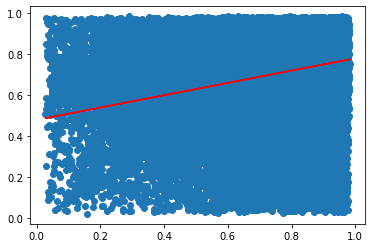

In [27]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [28]:
import scipy.stats

In [30]:
scipy.stats.pearsonr(x=df_sent_change['6m_BERT'], y=df_sent_change['over_6m_BERT'])

(0.27701136339898935, 0.0)